# Градиентный бустинг над решающими деревьями

In [28]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
import math
import matplotlib.pyplot as plt

Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241.

In [8]:
data = pd.read_csv('gbm-data.csv')

In [9]:
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [12]:
features = data.drop(['Activity'], axis=1)
target = data['Activity']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                      test_size=0.8, 
                                      random_state=42)

Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:

Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.
Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), где y_pred — предсказанное значение.
Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.

In [35]:
leaning_rate=[1, 0.5, 0.3, 0.2, 0.1]
log_loss_graph_train=[]
log_loss_graph_test=[]
for i in leaning_rate:
    clf = GradientBoostingClassifier(n_estimators=250,  verbose=True, learning_rate=i, random_state=241)
    clf.fit(X_train, y_train)
    #качество построенной композиции на каждой итерации
    #score_pred_train = clf.staged_decision_function(X_train)
    #score_pred_test = clf.staged_decision_function(X_test)
    #преобразовываем в сигмоидную функцию
    #score_pred_train_mod = (1 / (1 + math.exp(-score_pred_train)))
    #score_pred_test_mod = (1 / (1 + math.exp(-score_pred_test)))
    #предсказания принадлежности классу
    pred_train = clf.predict_proba(X_train)
    pred_test = clf.predict_proba(X_test)
    log_loss_graph_train.append(log_loss(y_train, pred_train))
    log_loss_graph_test.append(log_loss(y_test, pred_test))                           

      Iter       Train Loss   Remaining Time 
         1           0.9702           13.37s
         2           0.8545           11.57s
         3           0.7683           10.37s
         4           0.6936            9.82s
         5           0.6607            8.89s
         6           0.6001            9.21s
         7           0.5658            8.80s
         8           0.5447            8.24s
         9           0.5155            8.06s
        10           0.4857            7.84s
        20           0.2281            7.23s
        30           0.1289            6.54s
        40           0.0877            6.06s
        50           0.0620            5.81s
        60           0.0414            5.59s
        70           0.0281            5.19s
        80           0.0188            4.90s
        90           0.0133            4.57s
       100           0.0092            4.25s
       200           0.0004            1.27s
      Iter       Train Loss   Remaining Time 
        

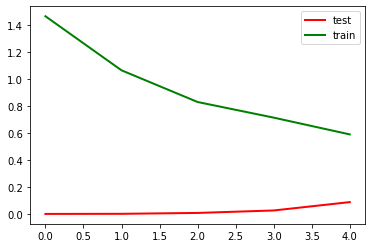

In [32]:
%matplotlib inline
plt.figure()
plt.plot(log_loss_graph_train, 'r', linewidth=2)
plt.plot(log_loss_graph_test, 'g', linewidth=2)
plt.legend(['test', 'train'])

      Iter       Train Loss   Remaining Time 
         1           0.9702           14.61s
         2           0.8545           12.12s
         3           0.7683           10.75s
         4           0.6936           10.12s
         5           0.6607            9.13s
         6           0.6001            9.83s
         7           0.5658            9.36s
         8           0.5447            8.76s
         9           0.5155            8.53s
        10           0.4857            8.25s
        20           0.2281            7.54s
        30           0.1289            6.78s
        40           0.0877            6.25s
        50           0.0620            6.02s
        60           0.0414            5.78s
        70           0.0281            5.49s
        80           0.0188            5.16s
        90           0.0133            4.85s
       100           0.0092            4.50s
       200           0.0004            1.35s
1.4641275179005981
0.5964664658901574


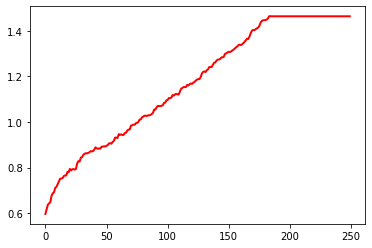

      Iter       Train Loss   Remaining Time 
         1           1.0910           12.55s
         2           0.9724           12.29s
         3           0.8760           12.17s
         4           0.8128           11.27s
         5           0.7601           10.66s
         6           0.7137           10.53s
         7           0.6763            9.89s
         8           0.6600            9.24s
         9           0.6340            8.89s
        10           0.6118            8.62s
        20           0.4100            7.47s
        30           0.2665            7.21s
        40           0.2010            6.52s
        50           0.1517            6.06s
        60           0.1201            5.64s
        70           0.0938            5.33s
        80           0.0724            5.02s
        90           0.0618            4.61s
       100           0.0502            4.29s
       200           0.0059            1.58s
1.0635642162762
0.548750681578218


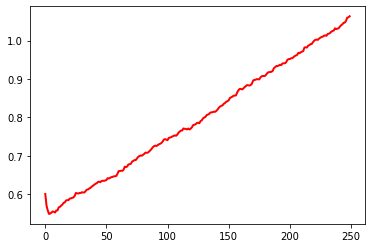

      Iter       Train Loss   Remaining Time 
         1           1.1863           12.71s
         2           1.0749           12.60s
         3           0.9970           12.68s
         4           0.9404           12.51s
         5           0.8895           12.45s
         6           0.8471           11.99s
         7           0.8017           11.95s
         8           0.7656           11.67s
         9           0.7315           11.91s
        10           0.7060           11.63s
        20           0.5562            9.54s
        30           0.4380            8.70s
        40           0.3589            8.19s
        50           0.2887            7.79s
        60           0.2450            7.14s
        70           0.2072            6.54s
        80           0.1805            6.02s
        90           0.1594            5.51s
       100           0.1323            5.13s
       200           0.0275            1.63s
0.8302056383482855
0.5315665548708755


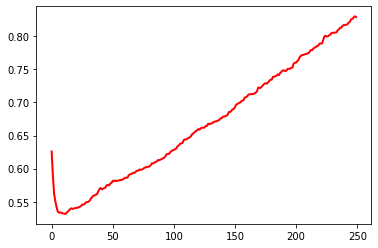

      Iter       Train Loss   Remaining Time 
         1           1.2452           12.57s
         2           1.1490           12.32s
         3           1.0778           12.13s
         4           1.0255           11.83s
         5           0.9762           11.83s
         6           0.9297           11.72s
         7           0.8981           11.69s
         8           0.8655           11.29s
         9           0.8377           10.92s
        10           0.8191           10.91s
        20           0.6407            9.04s
        30           0.5674            7.52s
        40           0.4894            7.36s
        50           0.4220            6.88s
        60           0.3573            6.57s
        70           0.3241            6.02s
        80           0.2875            5.64s
        90           0.2544            5.38s
       100           0.2309            5.08s
       200           0.0845            1.61s
0.7131891542248765
20
0.529289896312563


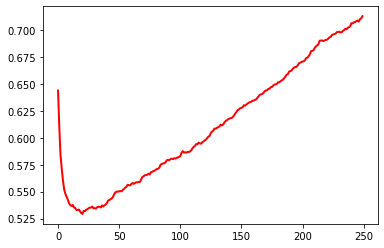

      Iter       Train Loss   Remaining Time 
         1           1.3118           16.33s
         2           1.2508           16.21s
         3           1.1985           15.72s
         4           1.1550           15.80s
         5           1.1170           15.56s
         6           1.0853           15.37s
         7           1.0563           15.21s
         8           1.0278           14.89s
         9           1.0035           14.79s
        10           0.9814           14.69s
        20           0.8103           12.50s
        30           0.7103           11.00s
        40           0.6475            9.96s
        50           0.5952            9.13s
        60           0.5599            8.16s
        70           0.5209            7.35s
        80           0.4921            6.60s
        90           0.4602            6.03s
       100           0.4314            5.51s
       200           0.2327            1.64s
0.6660053557462874
0.5280448945240224


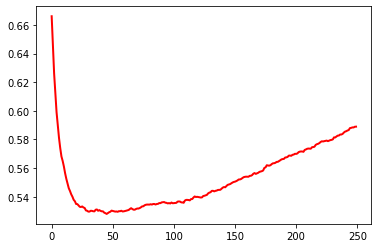

CPU times: user 40.3 s, sys: 104 ms, total: 40.4 s
Wall time: 40.3 s


In [33]:
%%time
from sklearn.metrics import log_loss
learning_rate=[1, 0.5, 0.3, 0.2, 0.1]
for i in range(5):
    cf=GradientBoostingClassifier( n_estimators=250, verbose=True, random_state=241,learning_rate=learning_rate[i])
    cf.fit(X_train,y_train)
    test_loss = np.empty(250)
    for m, y_decision in enumerate(cf.staged_decision_function(X_test)):
        y_pred_test = 1.0/(1.0 + np.exp(-y_decision))
        test_loss[m] = log_loss(y_test, y_pred_test)
    print(test_loss.max())
    if learning_rate[i]==0.2:
        print(min(range(len(test_loss)), key=test_loss.__getitem__))
    print(test_loss.min())

    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.show()